In [1]:
from os import listdir, mkdir
from os.path import join, isdir
import matplotlib.pyplot as plt
import numpy
import random
import shutil

In [3]:
src_path = ".\\UTKFace"
train_path = '.\\faces_train'
test_path = '.\\faces_test'
max_age = 80
trainset_ratio = 0.8

In [4]:
def purge_dataset():
    if(isdir(train_path)):
        shutil.rmtree(train_path)

    if(isdir(test_path)):
        shutil.rmtree(test_path)

def create_dirs():
    mkdir(train_path)
    mkdir(test_path)


purge_dataset()
create_dirs()

In [5]:
def group_file_names_by_age():
    file_names_by_age = {}

    for file_name in listdir(src_path):
        age = int(file_name.split("_")[0])
        age = numpy.clip(age, 1, max_age)

        if age in file_names_by_age:
            file_names_by_age[age].append(file_name)
        else:
            file_names_by_age[age] = [file_name]

    return file_names_by_age

file_names_by_age = group_file_names_by_age()

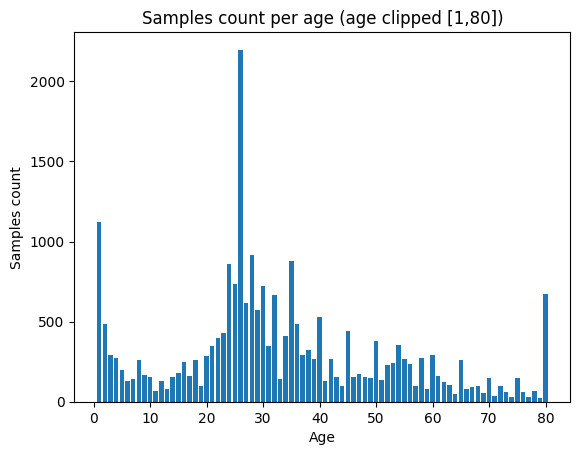

In [12]:
def plot_ages_count():
    ages_count = {}
    for (age, file_names) in file_names_by_age.items():
        ages_count[age] = len(file_names) 

    plt.bar(*zip(*ages_count.items()))
    plt.xlabel("Age")
    plt.ylabel("Samples count")
    plt.title("Samples count per age (age clipped [1,80])")

plot_ages_count()

In [7]:
def split_to_train_test_datasets():

    for _, file_names in file_names_by_age.items():
        train_count = int(len(file_names) * trainset_ratio)
        random.shuffle(file_names)

        train_file_names = file_names[:train_count]
        test_file_names = file_names[train_count:]

        copy_files(src_path, train_path, train_file_names)
        copy_files(src_path, test_path, test_file_names)



def copy_files(src_path, dest_path, file_names):
    for file_name in file_names:
        src = join(src_path, file_name)
        dest = join(dest_path, file_name)
        shutil.copy(src, dest)


split_to_train_test_datasets()

In [11]:
def print_counts():
    train_samples_count = len(listdir(train_path))
    test_samples_count = len(listdir(test_path))
    total = train_samples_count + test_samples_count

    print("Train samples: ", train_samples_count)
    print("Test samples: ", test_samples_count)
    print("Total: ", total)

print_counts()

Train samples:  18933
Test samples:  4775
Total:  23708
